<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisCuantitativoAvanzado/blob/main/SeriesdeTiempo/seasonal_decompose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/mjuez/pytsdatasets/master/pytsdatasets/data/airpassengers.csv')

<Axes: title={'center': 'data'}, xlabel='Año', ylabel='data'>

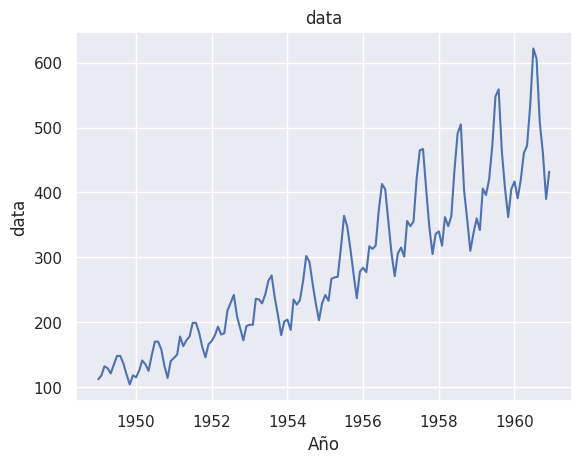

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
def graficar(variable):
    fig = sns.lineplot(x=data.index, y=variable)
    plt.title(variable.name)
    plt.xlabel("Año")
    plt.savefig('%s.png'%variable.name)
    return fig


data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)


graficar(data['data'])

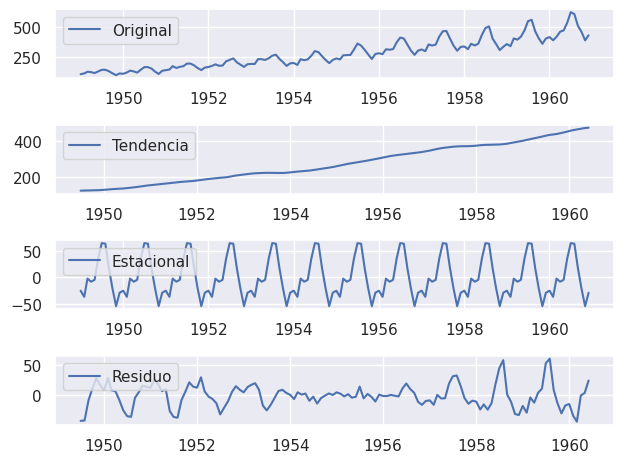

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose((data['data']))

original=decomposition.observed
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(original, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Estacional')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuo')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()